In [339]:
#from google.colab import drive
#drive.mount('/content/drive')

In [340]:
import pandas as pd
import numpy as np

In [341]:
names = ['Year','Month','ppt(mm)','tmax(degC)','tmin(degC)','aet(mm)','PDSI(unitless)','state','district','cluster14','cluster15','cluster18','cluster20','cluster25','cluster27','cluster30','cluster35']

In [342]:
df = pd.read_csv("/content/drive/MyDrive/agroclimatic_clusters.csv")

In [343]:
df.head()

,Year,Month,ppt(mm),tmax(degC),tmin(degC),aet(mm),PDSI(unitless),state,district,cluster14,cluster15,cluster18,cluster20,cluster25,cluster27,cluster30,cluster35
0,1958,1,0,32.1,16.6,2,-0.1,maharashtra,solapur,8,7,0,7,12,23,15,23
1,1958,2,0,34.2,18.4,2,-0.5,maharashtra,solapur,8,7,0,7,12,23,15,23
2,1958,3,17,38.5,21.5,17,0.2,maharashtra,solapur,8,7,0,7,12,23,15,23
3,1958,4,32,40.2,25.3,32,0.8,maharashtra,solapur,8,7,0,7,12,23,15,23
4,1958,5,68,40.5,25.8,65,1.5,maharashtra,solapur,8,7,0,7,12,23,15,23


In [344]:
df['cluster15'].value_counts()

5     89280
11    62496
4     55800
7     55056
14    31992
1     29760
8     27528
2     24552
9     22320
12    14136
0     10416
13     6696
6      5952
3      4464
10     1488
Name: cluster15, dtype: int64

In [345]:
a = []
for i in range(len(df)):
    if df['cluster15'][i]!=13:
        a.append(i)

In [346]:
df = df.drop(a)

In [347]:
df.head()

,Year,Month,ppt(mm),tmax(degC),tmin(degC),aet(mm),PDSI(unitless),state,district,cluster14,cluster15,cluster18,cluster20,cluster25,cluster27,cluster30,cluster35
26784,1958,1,3,31.3,21.7,85,0.8,puducherry,mahe,2,13,1,8,2,19,3,13
26785,1958,2,7,31.1,23.3,72,0.9,puducherry,mahe,2,13,1,8,2,19,3,13
26786,1958,3,30,32.3,24.6,89,1.5,puducherry,mahe,2,13,1,8,2,19,3,13
26787,1958,4,83,32.2,25.5,107,1.7,puducherry,mahe,2,13,1,8,2,19,3,13
26788,1958,5,279,31.2,25.2,143,1.6,puducherry,mahe,2,13,1,8,2,19,3,13


In [348]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6696 entries, 26784 to 306527
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year            6696 non-null   int64  
 1   Month           6696 non-null   int64  
 2   ppt(mm)         6696 non-null   int64  
 3   tmax(degC)      6696 non-null   float64
 4   tmin(degC)      6696 non-null   float64
 5   aet(mm)         6696 non-null   int64  
 6   PDSI(unitless)  6696 non-null   float64
 7   state           6696 non-null   object 
 8   district        6696 non-null   object 
 9   cluster14       6696 non-null   int64  
 10  cluster15       6696 non-null   int64  
 11  cluster18       6696 non-null   int64  
 12  cluster20       6696 non-null   int64  
 13  cluster25       6696 non-null   int64  
 14  cluster27       6696 non-null   int64  
 15  cluster30       6696 non-null   int64  
 16  cluster35       6696 non-null   int64  
dtypes: float64(3), int64(12), o

In [349]:
conditions = df[['Year','Month','ppt(mm)','tmax(degC)','tmin(degC)','aet(mm)','PDSI(unitless)','district']]
conditions.shape

(6696, 8)

In [350]:
conditions.isnull().sum(axis = 0)

Year              0
Month             0
ppt(mm)           0
tmax(degC)        0
tmin(degC)        0
aet(mm)           0
PDSI(unitless)    0
district          0
dtype: int64

In [351]:
conditions["date"] = conditions['Month'].astype('str')+'-'+conditions["Year"].astype(str)
conditions.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Year,Month,ppt(mm),tmax(degC),tmin(degC),aet(mm),PDSI(unitless),district,date
26784,1958,1,3,31.3,21.7,85,0.8,mahe,1-1958
26785,1958,2,7,31.1,23.3,72,0.9,mahe,2-1958
26786,1958,3,30,32.3,24.6,89,1.5,mahe,3-1958
26787,1958,4,83,32.2,25.5,107,1.7,mahe,4-1958
26788,1958,5,279,31.2,25.2,143,1.6,mahe,5-1958


In [352]:
conditions['Day'] = [1] * len(conditions['Month'])
conditions['date'] = pd.to_datetime(conditions[['Year','Month','Day']])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [353]:
conditions.head()

,Year,Month,ppt(mm),tmax(degC),tmin(degC),aet(mm),PDSI(unitless),district,date,Day
26784,1958,1,3,31.3,21.7,85,0.8,mahe,1958-01-01,1
26785,1958,2,7,31.1,23.3,72,0.9,mahe,1958-02-01,1
26786,1958,3,30,32.3,24.6,89,1.5,mahe,1958-03-01,1
26787,1958,4,83,32.2,25.5,107,1.7,mahe,1958-04-01,1
26788,1958,5,279,31.2,25.2,143,1.6,mahe,1958-05-01,1


In [354]:
conditions['mid_temp'] = 0.5*(conditions['tmax(degC)']+conditions['tmin(degC)'])
conditions.drop(columns = ['tmax(degC)','tmin(degC)'],inplace = True)
conditions.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Year,Month,ppt(mm),aet(mm),PDSI(unitless),district,date,Day,mid_temp
26784,1958,1,3,85,0.8,mahe,1958-01-01,1,26.50
26785,1958,2,7,72,0.9,mahe,1958-02-01,1,27.20
26786,1958,3,30,89,1.5,mahe,1958-03-01,1,28.45
26787,1958,4,83,107,1.7,mahe,1958-04-01,1,28.85
26788,1958,5,279,143,1.6,mahe,1958-05-01,1,28.20


In [355]:
conditions.tail()

,Year,Month,ppt(mm),aet(mm),PDSI(unitless),district,date,Day,mid_temp
306523,2019,8,969,92,-1.9,kasaragod,2019-08-01,1,25.95
306524,2019,9,373,114,-1.4,kasaragod,2019-09-01,1,26.95
306525,2019,10,580,114,6.4,kasaragod,2019-10-01,1,27.15
306526,2019,11,68,104,5.3,kasaragod,2019-11-01,1,27.90
306527,2019,12,44,94,5.6,kasaragod,2019-12-01,1,27.45


In [356]:
conditions_truncated = conditions.loc[(conditions['Year']>1980) & (conditions['Year']<2019)]
conditions_val = conditions.loc[conditions['Year']==2019]

train = conditions_truncated[['date','ppt(mm)','mid_temp','aet(mm)','district']]
train.rename(columns = {'mid_temp':'y'}, inplace = True)

train.reset_index(inplace = True)
train.drop(columns = 'index',inplace = True)
train.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,date,ppt(mm),y,aet(mm),district
0,1981-01-01,6,26.55,83,mahe
1,1981-02-01,1,27.05,75,mahe
2,1981-03-01,25,28.65,87,mahe
3,1981-04-01,54,29.45,93,mahe
4,1981-05-01,475,29.20,158,mahe


In [357]:
conditions_val

,Year,Month,ppt(mm),aet(mm),PDSI(unitless),district,date,Day,mid_temp
27516,2019,1,0,80,-2.6,mahe,2019-01-01,1,26.15
27517,2019,2,2,68,-2.9,mahe,2019-02-01,1,27.60
27518,2019,3,7,72,-3.2,mahe,2019-03-01,1,28.70
27519,2019,4,70,96,-3.0,mahe,2019-04-01,1,29.80
27520,2019,5,106,119,-3.0,mahe,2019-05-01,1,30.05
...,...,...,...,...,...,...,...,...,...
306523,2019,8,969,92,-1.9,kasaragod,2019-08-01,1,25.95
306524,2019,9,373,114,-1.4,kasaragod,2019-09-01,1,26.95
306525,2019,10,580,114,6.4,kasaragod,2019-10-01,1,27.15
306526,2019,11,68,104,5.3,kasaragod,2019-11-01,1,27.90


In [358]:
from fbprophet import Prophet

In [359]:

model = Prophet()

In [360]:
conditions_truncated.rename(columns = {'date':'ds'}, inplace = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [361]:
train.rename(columns = {'date':'ds'}, inplace = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [362]:
train.tail()


,ds,ppt(mm),y,aet(mm),district
4099,2018-08-01,695,25.60,103,kasaragod
4100,2018-09-01,170,27.05,143,kasaragod
4101,2018-10-01,181,27.90,130,kasaragod
4102,2018-11-01,34,28.60,96,kasaragod
4103,2018-12-01,13,27.15,79,kasaragod


In [363]:
model.fit(train)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [364]:
fut = model.make_future_dataframe(periods = 13, freq = 'M')

In [365]:

forecast = model.predict(fut)

In [366]:
forecast.tail()


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
464,2019-08-31,27.703336,26.132453,27.821078,27.693824,27.712230,-0.685689,-0.685689,-0.685689,-0.685689,-0.685689,-0.685689,0.0,0.0,0.0,27.017647
465,2019-09-30,27.706408,26.429257,28.159650,27.694499,27.717311,-0.425956,-0.425956,-0.425956,-0.425956,-0.425956,-0.425956,0.0,0.0,0.0,27.280452
466,2019-10-31,27.709583,26.504855,28.163687,27.695676,27.722559,-0.357213,-0.357213,-0.357213,-0.357213,-0.357213,-0.357213,0.0,0.0,0.0,27.352370
467,2019-11-30,27.712655,26.167357,27.848386,27.695423,27.727484,-0.672584,-0.672584,-0.672584,-0.672584,-0.672584,-0.672584,0.0,0.0,0.0,27.040071
468,2019-12-31,27.715829,26.036125,27.719254,27.695411,27.732567,-0.846096,-0.846096,-0.846096,-0.846096,-0.846096,-0.846096,0.0,0.0,0.0,26.869733


In [367]:

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
464,2019-08-31,27.017647,26.132453,27.821078
465,2019-09-30,27.280452,26.429257,28.159650
466,2019-10-31,27.352370,26.504855,28.163687
467,2019-11-30,27.040071,26.167357,27.848386
468,2019-12-31,26.869733,26.036125,27.719254


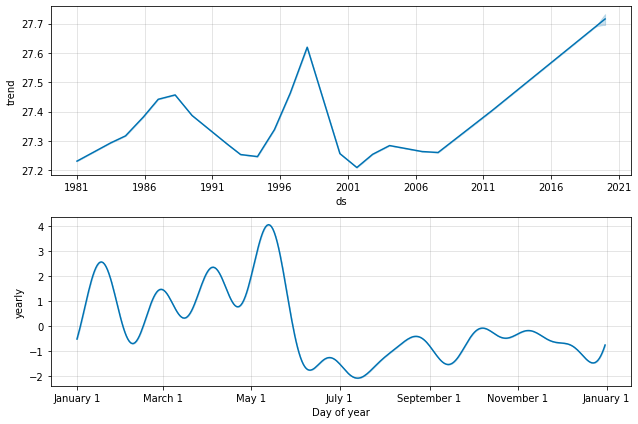

In [368]:
fig2 = model.plot_components(forecast)

In [369]:
forecast_2019 = forecast.tail(12)
forecast_2019["Month"] = forecast_2019["ds"].dt.month
print (forecast_2019[["yhat"]].shape,conditions_val[["mid_temp"]].shape)
test = pd.merge(conditions_val[["mid_temp","Month"]],forecast_2019[["yhat","Month"]])
# cols = ['ds','actual','yhat']
from sklearn.metrics import mean_squared_error
print (mean_squared_error(test["mid_temp"], test["yhat"]))
test

(12, 1) (108, 1)
2.1268827358424782


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,mid_temp,Month,yhat
0,26.15,1,28.131072
1,24.75,1,28.131072
2,26.90,1,28.131072
3,25.45,1,28.131072
4,26.55,1,28.131072
...,...,...,...
103,27.75,12,26.869733
104,27.90,12,26.869733
105,28.95,12,26.869733
106,28.95,12,26.869733


In [370]:
import matplotlib.pyplot as plt

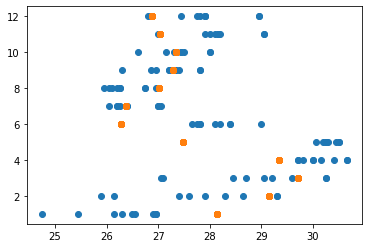

In [371]:
plt.scatter([test['mid_temp']],test['Month'])
plt.scatter([test['yhat']],test['Month'])
plt.show()


In [372]:
import pickle

In [373]:
filename = 'Cluster 15 - 13.sav'
pickle.dump(model, open(filename, 'wb'))

In [374]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.predict(fut)

In [375]:
result.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1981-01-01,27.231279,25.936564,27.595453,27.231279,27.231279,-0.521159,-0.521159,-0.521159,-0.521159,-0.521159,-0.521159,0.0,0.0,0.0,26.710120
1,1981-02-01,27.233409,26.547512,28.142562,27.233409,27.233409,0.124021,0.124021,0.124021,0.124021,0.124021,0.124021,0.0,0.0,0.0,27.357431
2,1981-03-01,27.235334,27.877220,29.489683,27.235334,27.235334,1.457992,1.457992,1.457992,1.457992,1.457992,1.457992,0.0,0.0,0.0,28.693326
3,1981-04-01,27.237464,28.551139,30.249830,27.237464,27.237464,2.177768,2.177768,2.177768,2.177768,2.177768,2.177768,0.0,0.0,0.0,29.415233
4,1981-05-01,27.239526,28.371329,30.005049,27.239526,27.239526,1.983446,1.983446,1.983446,1.983446,1.983446,1.983446,0.0,0.0,0.0,29.222972
